In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [185]:
company= pd.read_csv('C:/Users/krishna/Downloads/Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [186]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [187]:
!pip install category_encoders

In [188]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
company1 = encoder.fit_transform(company)

C:\Users\krishna\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [189]:
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,3,59,12,1,1
3,7.40,117,100,4,466,97,3,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,2


In [190]:
# Converting the Sales column into categorical value using mean of the column 7.49
sales_val = []
for value in company1["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
company1["sales_val"]= sales_val

In [191]:
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low


In [192]:
X = company1.drop(['Sales','sales_val'], axis =1)
Y = company1['sales_val'] #Y is our target variable

In [193]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [194]:
Y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales_val, Length: 400, dtype: object

In [195]:
# Splitting data into training and testing data set # took 20% of data as test and 80% train
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [196]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5) #max depth means how many layers in tree we want,here wetook 5
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [197]:
pred = model.predict(x_test)
print('Test data Accuracy is:',np.mean(pred==y_test))
pred1 = model.predict(x_train)
print('Train data Accuracy is:',np.mean(pred1==y_train))

Test data Accuracy is: 0.6375
Train data Accuracy is: 0.8125


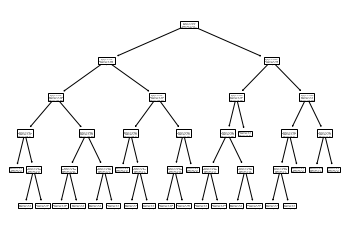

In [198]:
#PLot the decision tree
tree.plot_tree(model);

In [199]:
company1.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_val'],
      dtype='object')

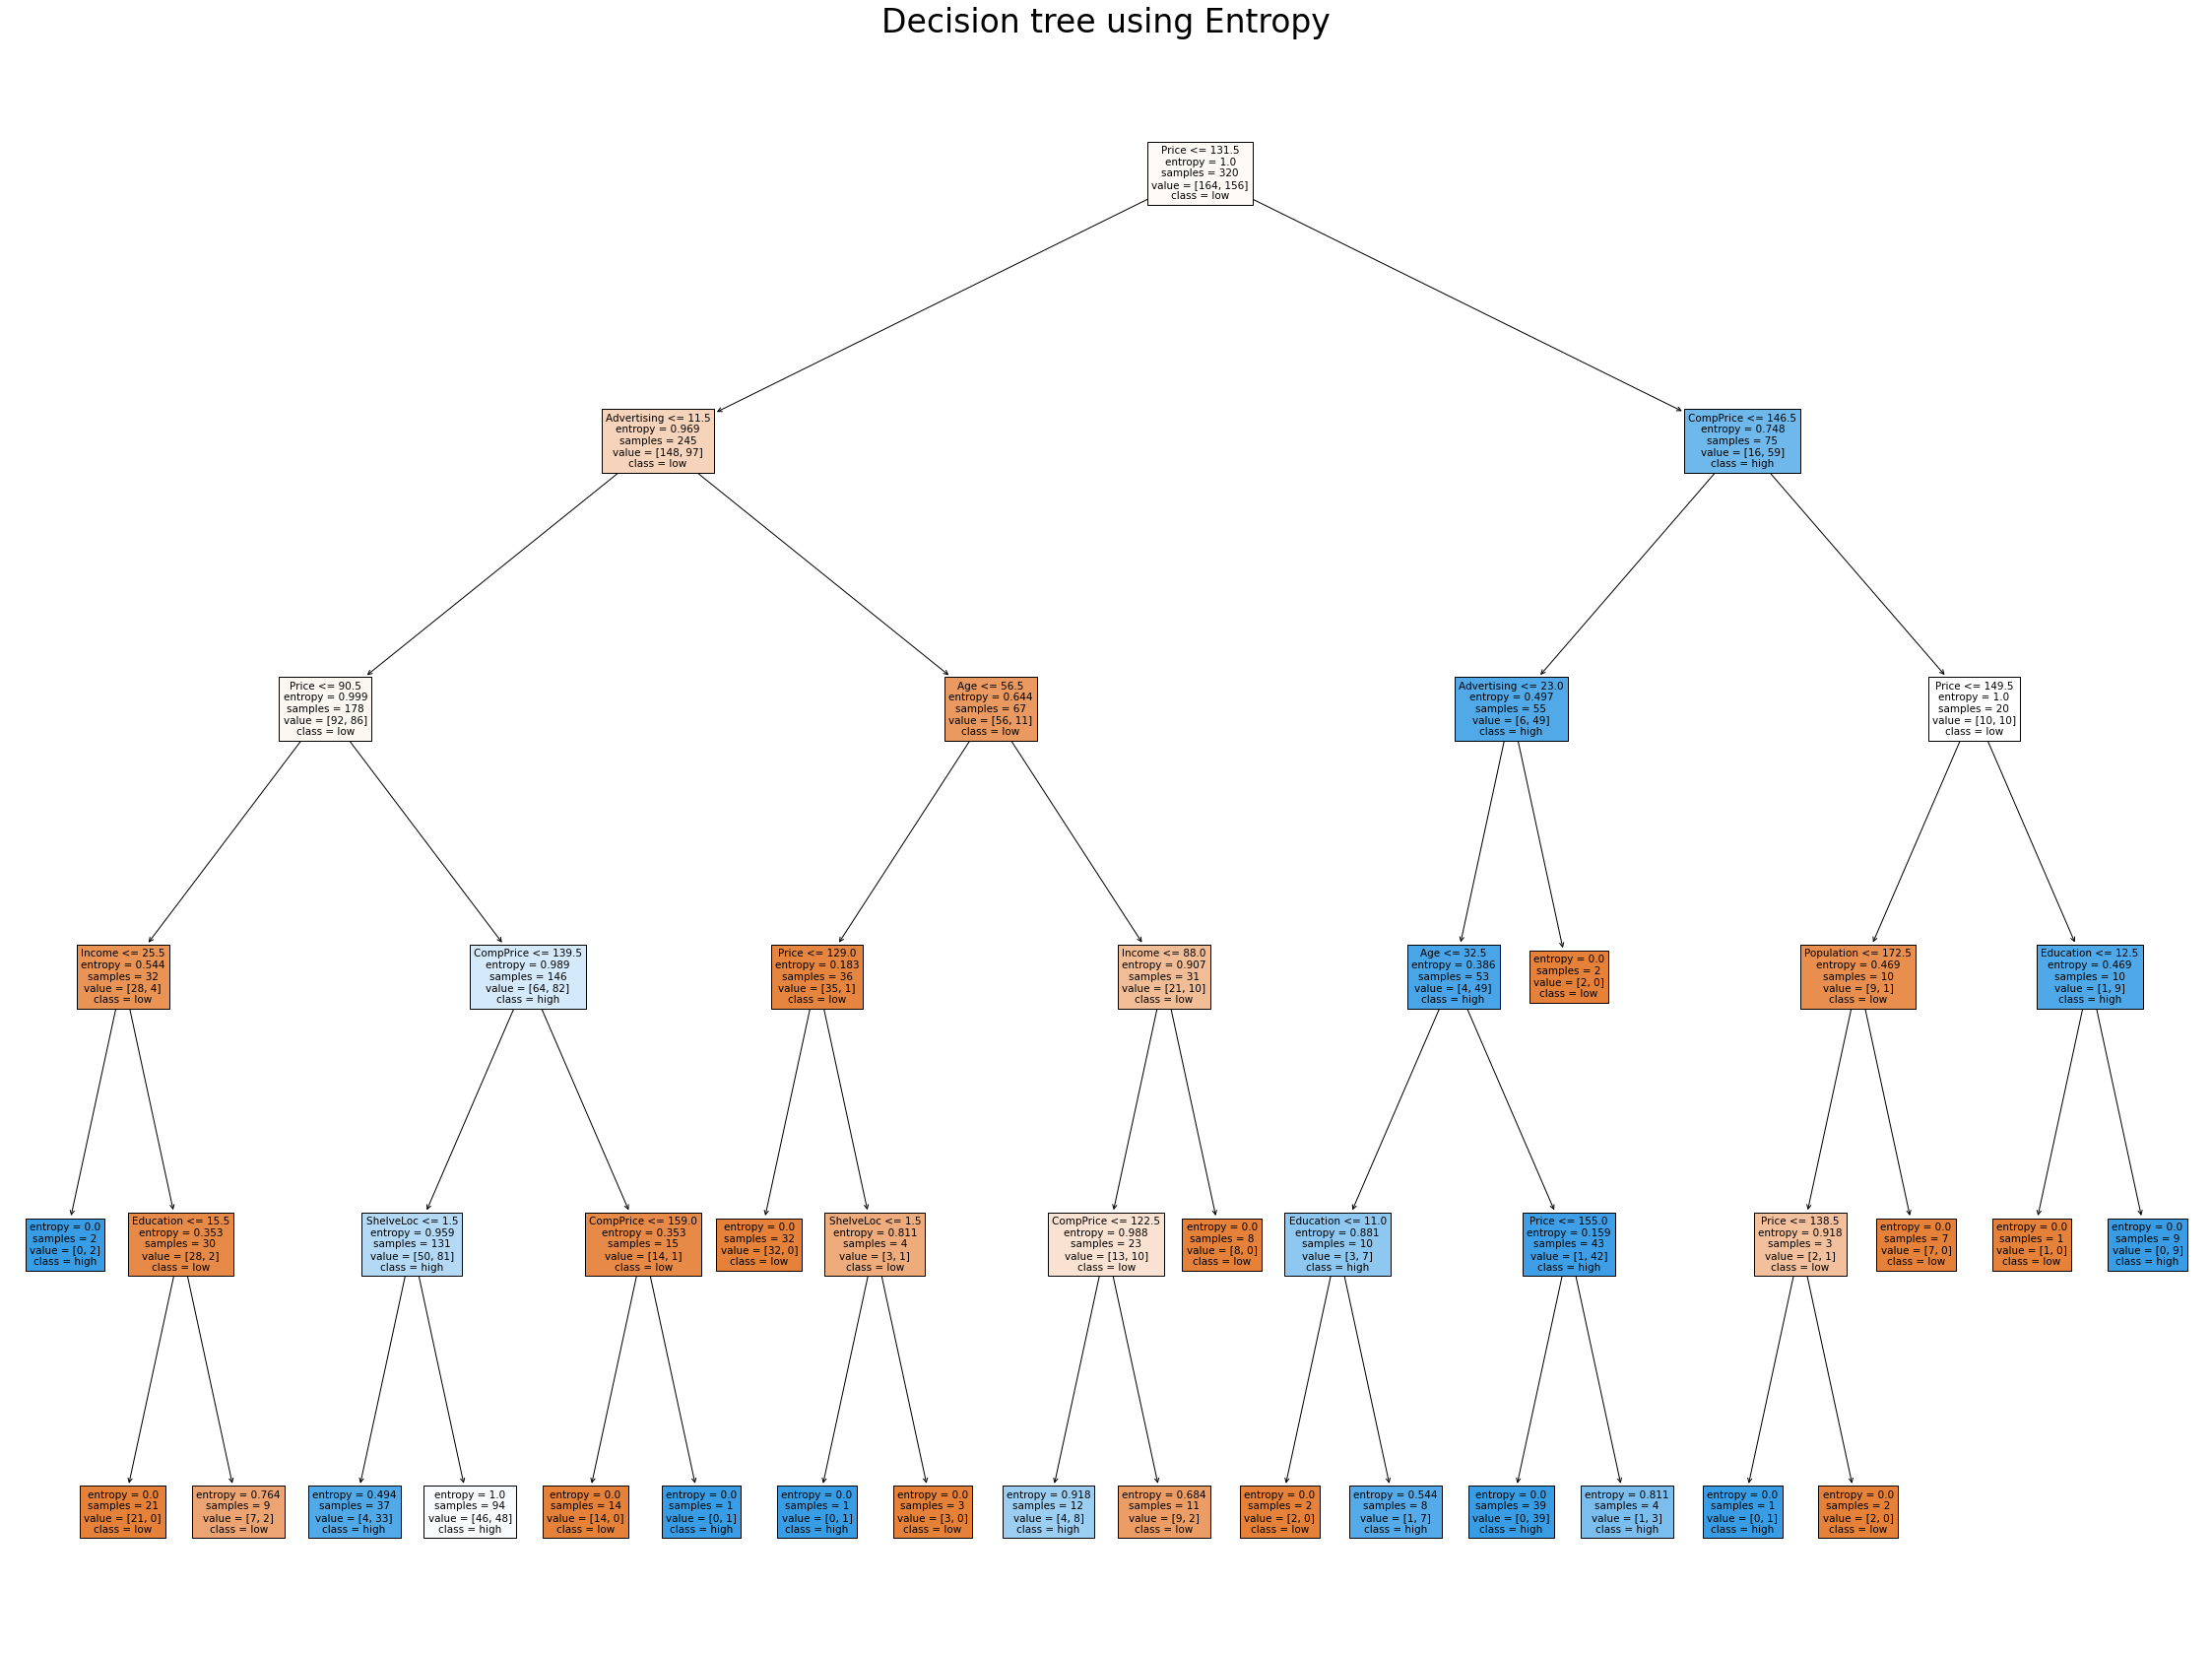

In [200]:
# let's plot the decision tree
fig = plt.figure(figsize=(40,30))
fig = tree.plot_tree(model,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=33)
plt.savefig('DT_Entropy.pdf')

In [201]:
####From the above decision tree 3 most important features that affect sales are:
#Comp Price, Advertising, Price

# Building Decision Tree Classifier (CART) using Gini Criteria

In [202]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [203]:
pred_testg1 = model_gini.predict(x_test)
print('Test data Accuracy is:',np.mean(pred_testg1==y_test))
#Predicting on train data
pred_traing1 = model_gini.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train))

Test data Accuracy is: 0.725
Train data Accuracy is: 0.8875


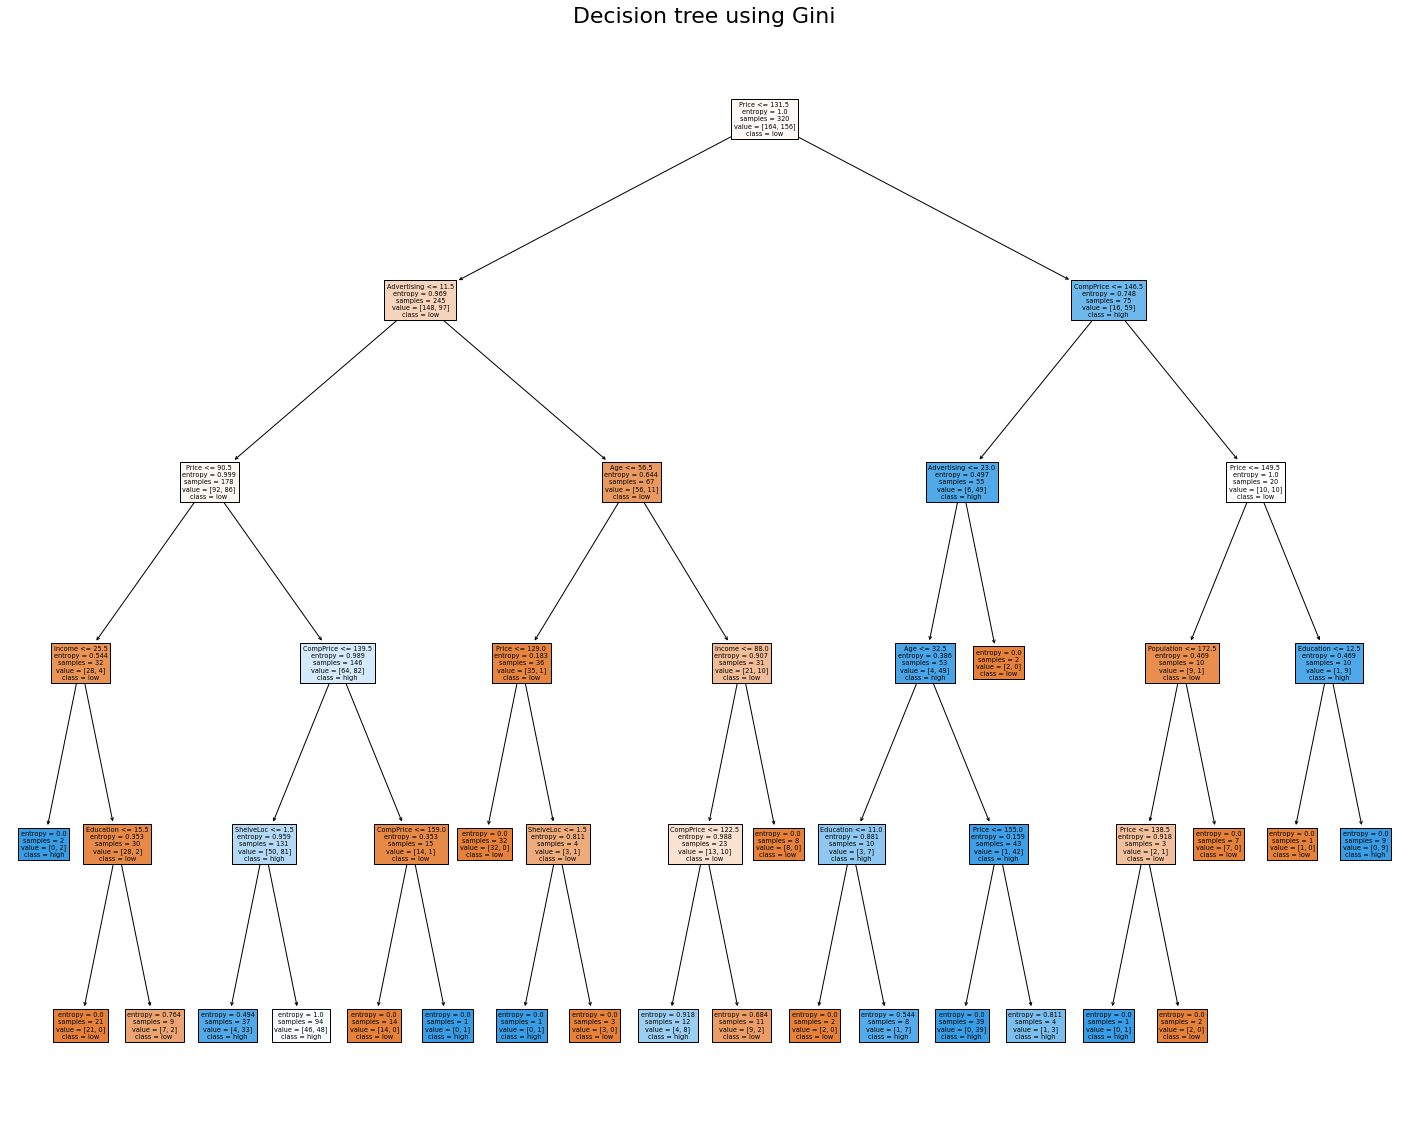

In [204]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)
plt.savefig('DT_Gini.pdf')

# Hence both gives us best result at max depth = 5 and three most important features are CompPrice, Price, Advertising.